### Importing the libraries

In [22]:
import pandas as pd
import numpy as np

### Lets import the Data

In [23]:
data = pd.read_csv("RS final.csv")
df = data.copy()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-04-03,11.250000,12.375000,11.250000,12.031250,8.401433,77000
1,2000-04-04,12.031250,12.031250,11.437500,11.625000,8.117750,33200
2,2000-04-05,11.562500,11.750000,11.500000,11.750000,8.205038,13600
3,2000-04-06,11.812500,12.062500,11.812500,12.062500,8.423261,28800
4,2000-04-07,11.937500,12.062500,11.906250,12.000000,8.379616,46600
...,...,...,...,...,...,...,...
6030,2024-03-22,332.010010,332.839996,328.559998,330.429993,330.429993,207400
6031,2024-03-25,332.230011,336.130005,331.489990,331.529999,331.529999,211400
6032,2024-03-26,332.329987,334.679993,329.109985,331.380005,331.380005,203100
6033,2024-03-27,333.700012,337.109985,333.299988,336.899994,336.899994,170400


### Let's understand the data

In [24]:
df.shape

(6035, 7)

checking for null values

In [25]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [26]:
df.dtypes 

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [27]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace= True)

In [28]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [29]:
# date_col = [col for col in df.columns if df[col].dtype == "datetime64[ns]"]
# cat_cols = [col for col in df.columns if df[col].dtype == "object"]
con_cols = [col for col in df.columns if df[col].dtype == "int64" or df[col].dtype == "float64"]


In [30]:
# cat_cols

In [31]:
# date_col

In [32]:
con_cols

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

### Lets visualize the data

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


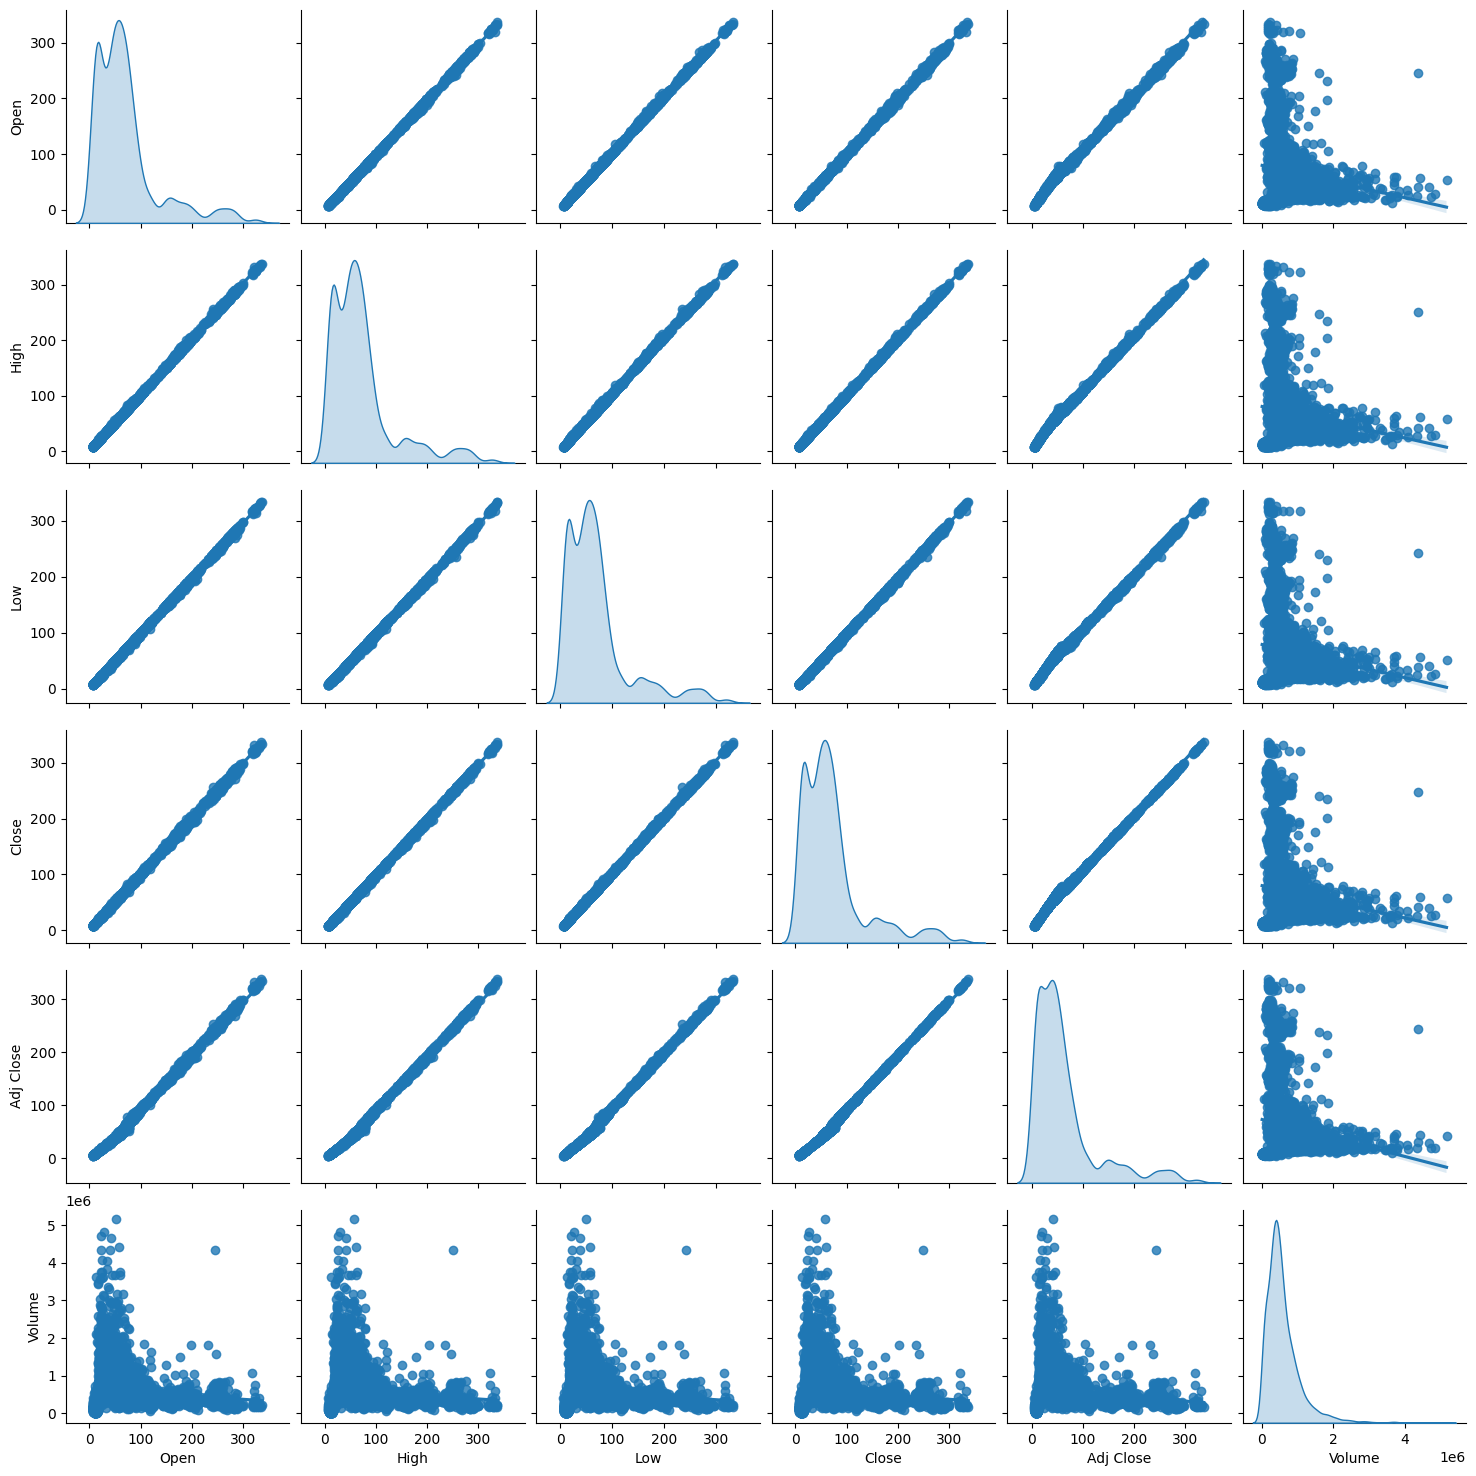

In [34]:
sns.pairplot(df[con_cols], kind= 'reg', diag_kind='kde')

In [35]:
df.columns[:-1]

Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

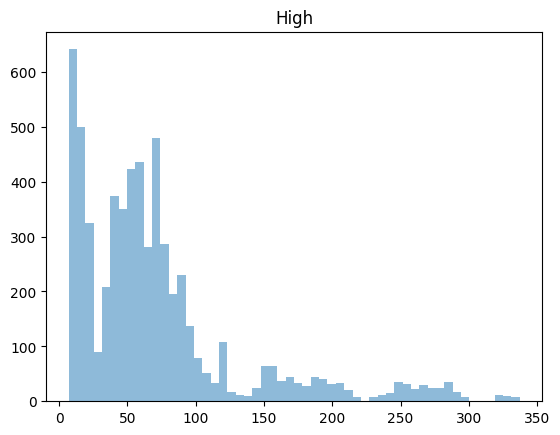

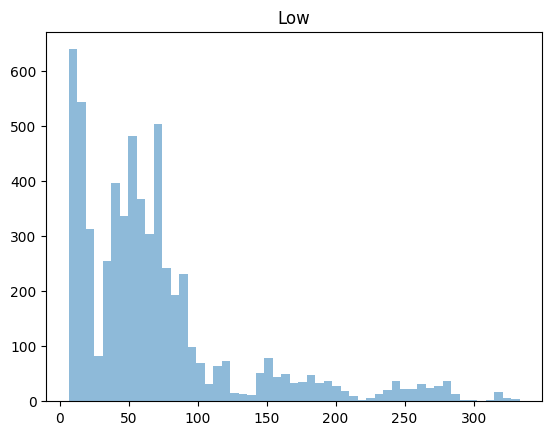

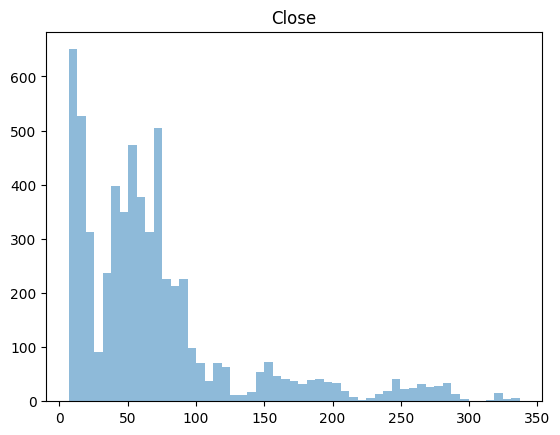

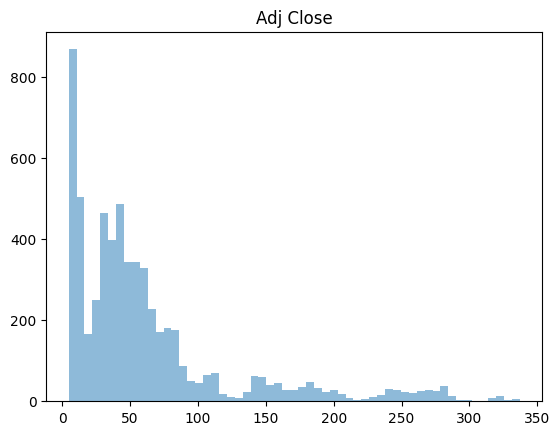

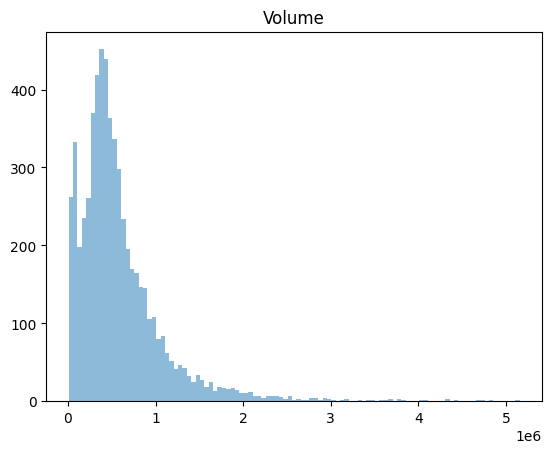

In [36]:
for i, col in enumerate(df.columns[1:]):
    plt.hist(df[col],alpha = 0.5, bins="auto")
    plt.title(col)
    plt.show()

In [37]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6035.000000,6035.000000,6035.000000,6035.000000,6035.000000,6.035000e+03
mean,71.067978,71.983056,70.136290,71.079825,62.832499,5.859031e+05
std,62.498036,63.173036,61.854589,62.545631,63.264048,5.005749e+05
min,6.740000,6.970000,6.575000,6.740000,4.847087,7.400000e+03
25%,26.567499,27.605001,25.445000,26.524999,19.866309,2.879500e+05
50%,56.380001,57.099998,55.590000,56.330002,43.784885,4.635000e+05
75%,83.360001,84.270001,82.290001,83.250000,73.784634,7.470000e+05
max,336.609985,337.109985,333.299988,336.899994,336.899994,5.155700e+06


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6035 entries, 2000-04-03 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6035 non-null   float64
 1   High       6035 non-null   float64
 2   Low        6035 non-null   float64
 3   Close      6035 non-null   float64
 4   Adj Close  6035 non-null   float64
 5   Volume     6035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 330.0 KB


In [39]:
df[con_cols].corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999868,0.999861,0.999711,0.997974,-0.116788
High,0.999868,1.000000,0.999832,0.999874,0.998131,-0.113177
Low,0.999861,0.999832,1.000000,0.999861,0.998139,-0.120328
Close,0.999711,0.999874,0.999861,1.000000,0.998259,-0.116522
Adj Close,0.997974,0.998131,0.998139,0.998259,1.000000,-0.138288
Volume,-0.116788,-0.113177,-0.120328,-0.116522,-0.138288,1.000000


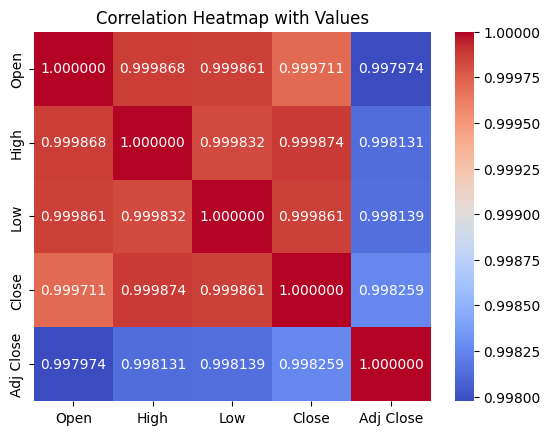

In [40]:
heatmap = sns.heatmap(df[con_cols[:-1]].corr(), annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Correlation Heatmap with Values')
plt.show()

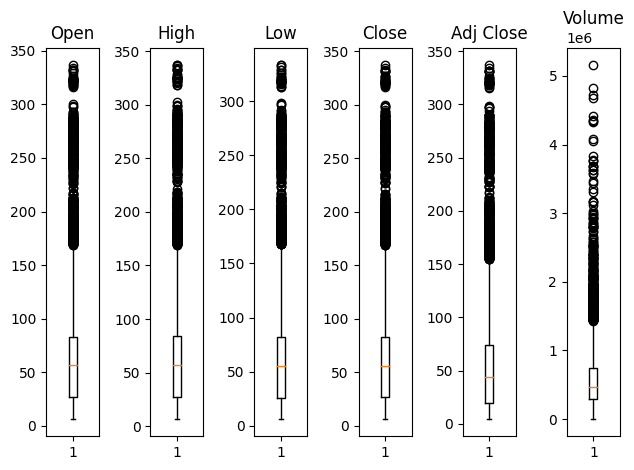

In [41]:
for i, col in enumerate(df[con_cols].columns):
    plt.subplot(1, len(df[con_cols].columns), i+1)
    plt.boxplot(df[col])
    plt.title(col)
    # plt.show()
plt.tight_layout()
plt.show()

In [44]:
import mplfinance as mpf

/home/its_relative/.local/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


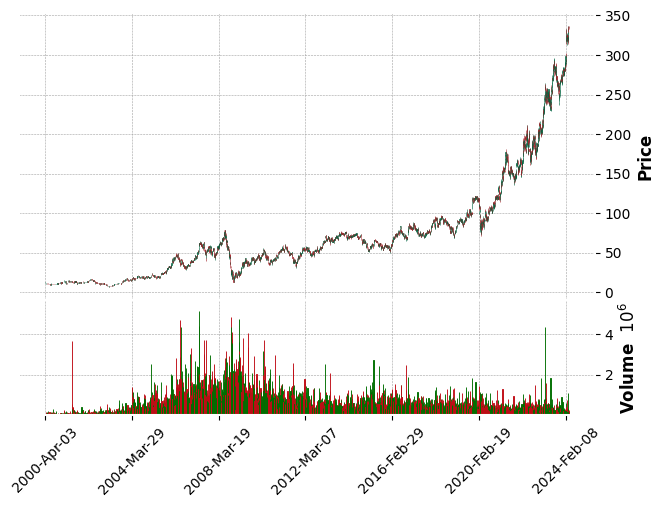

In [45]:
mpf.plot(df, type='candle', ylabel='Price', volume=True, style='charles')


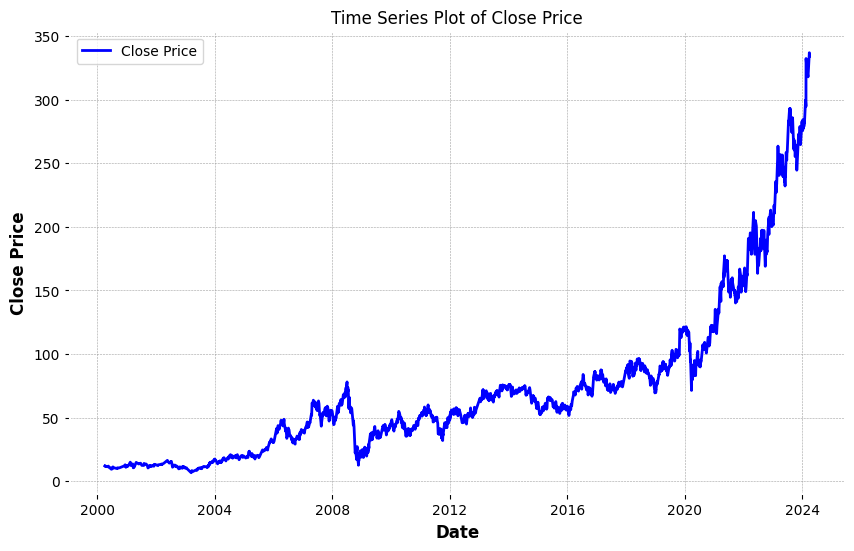

In [54]:
# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Plot of Close Price')
plt.legend()
plt.grid(True)
plt.show()

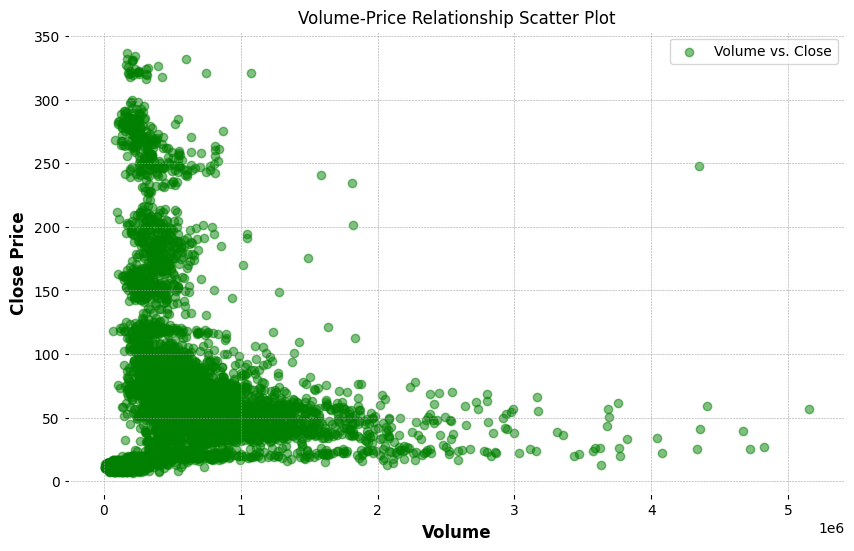

In [53]:

# Plotting the volume-price relationship scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], label='Volume vs. Close', color='green', alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Volume-Price Relationship Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()


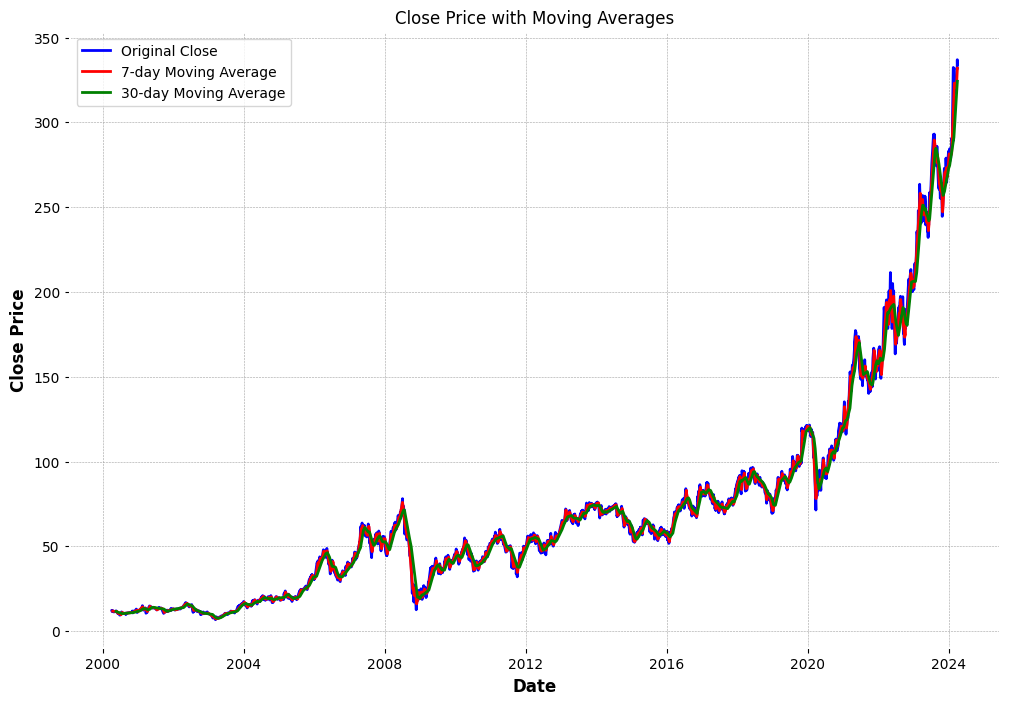

In [52]:
# Calculate moving averages (e.g., 7-day, 30-day)
df['Close_7day_MA'] = df['Close'].rolling(window=7).mean()
df['Close_30day_MA'] = df['Close'].rolling(window=30).mean()

# Plotting the original data and moving averages
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Close'], label='Original Close', color='blue')
plt.plot(df.index, df['Close_7day_MA'], label='7-day Moving Average', color='red')
plt.plot(df.index, df['Close_30day_MA'], label='30-day Moving Average', color='green')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()



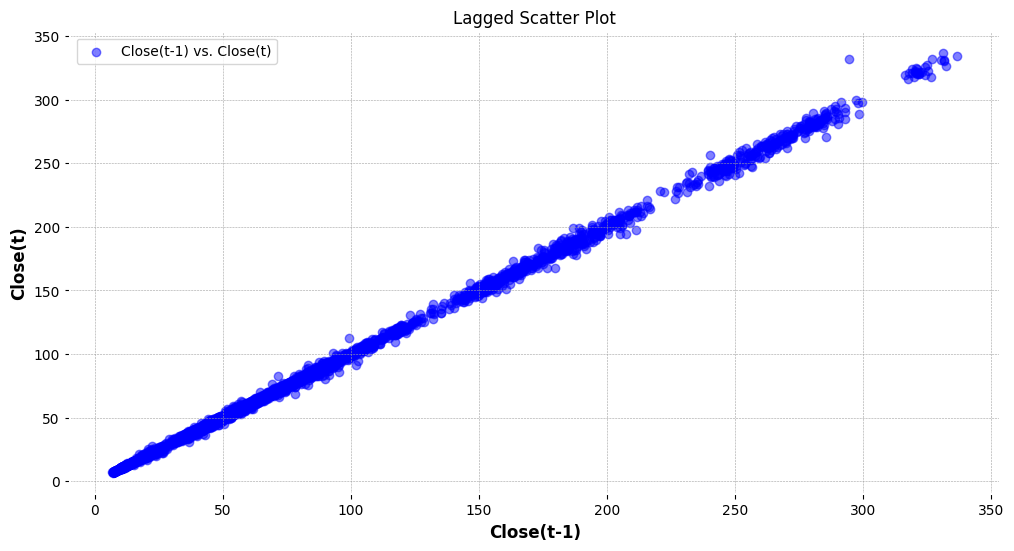

In [56]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# # Autocorrelation Plot (ACF)
# plt.figure(figsize=(12, 6))
# plot_acf(df['Close'], lags=30, alpha=0.05) 
# plt.xlabel('Lag')
# plt.ylabel('Autocorrelation')
# plt.title('Autocorrelation Function (ACF)')
# plt.grid(True)
# plt.show()

# # Partial Autocorrelation Plot (PACF)
# plt.figure(figsize=(12, 6))
# plot_pacf(df['Close'], lags=30, alpha=0.05) 
# plt.xlabel('Lag')
# plt.ylabel('Partial Autocorrelation')
# plt.title('Partial Autocorrelation Function (PACF)')
# plt.grid(True)
# plt.show()

# Lagged Scatter Plots
plt.figure(figsize=(12, 6))
plt.scatter(df['Close'].shift(1), df['Close'], label='Close(t-1) vs. Close(t)', color='blue', alpha=0.5)
plt.xlabel('Close(t-1)')
plt.ylabel('Close(t)')
plt.title('Lagged Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

